## 🚦 Road Traffic Accident Analysis (Exploratory Data Analysis)
 Road traffic accidents remain a major public safety concern, leading to loss of lives, injuries, and economic impact. Understanding the patterns and contributing factors behind these accidents is essential for developing effective prevention strategies.

In this project, I perform an Exploratory Data Analysis (EDA) on road traffic accident data from **Addis Ababa City**. The goal is to uncover trends related to accident severity, driver demographics, vehicle characteristics, and causes of accidents. By analyzing this data, I aim to generate insights that can support data-driven decisions for improving road safety and reducing accident-related risks.

This project demonstrates an end-to-end data analysis workflow, including data cleaning, visualization, and interpretation of findings using **Python, Pandas, Matplotlib, and Seaborn**.

## Exploring and Understanding the Data

In [2]:
# Export libraies and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot apperance
plt.rcParams['figure.figsize'] = (10,6)

# Load dataset
df = pd.read_csv('Addis_Ababa_city_RTA.csv')

# Display first 5 rows of the dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Drivers_gender,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Casualty_gender,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,2,Going straight,Driver or rider,Male,31-50,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,2,Going straight,Pedestrian,Female,18-30,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
# Check the shape of the dataset to see number of rows and columns
df.shape

(13063, 31)

### Dataset has 13,063 rows and 31 columns

In [4]:
# Check the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         13063 non-null  object
 1   Day_of_week                  13063 non-null  object
 2   Age_band_of_driver           13063 non-null  object
 3   Drivers_gender               13063 non-null  object
 4   Educational_level            12297 non-null  object
 5   Vehicle_driver_relation      12464 non-null  object
 6   Driving_experience           12187 non-null  object
 7   Type_of_vehicle              12096 non-null  object
 8   Owner_of_vehicle             12555 non-null  object
 9   Service_year_of_vehicle      9073 non-null   object
 10  Defect_of_vehicle            8496 non-null   object
 11  Area_accident_occured        12823 non-null  object
 12  Lanes_or_Medians             12586 non-null  object
 13  Road_allignment              12

In [5]:
# Check for missing values
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Drivers_gender                    0
Educational_level               766
Vehicle_driver_relation         599
Driving_experience              876
Type_of_vehicle                 967
Owner_of_vehicle                508
Service_year_of_vehicle        3990
Defect_of_vehicle              4567
Area_accident_occured           240
Lanes_or_Medians                477
Road_allignment                 144
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Casualty_gender                   0
Age_band_of_casualty              0
Work_of_casuality              3382
Fitness_of_casuality        

## Data Cleaning

In [6]:
# Convert day of the week column to categorical type so python does not treat it as a string
# Define the logical order of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert to categorical type with the defined order
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=day_order, ordered=True)

# Verify the change
df['Day_of_week'].dtype


CategoricalDtype(categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                  'Friday', 'Saturday'],
, ordered=True, categories_dtype=object)

## Data Analysis

### 1. Accident Severity Analysis: Understanding the Impact of Crashes

In [7]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10776
Serious Injury     1976
Fatal injury        311
Name: count, dtype: int64

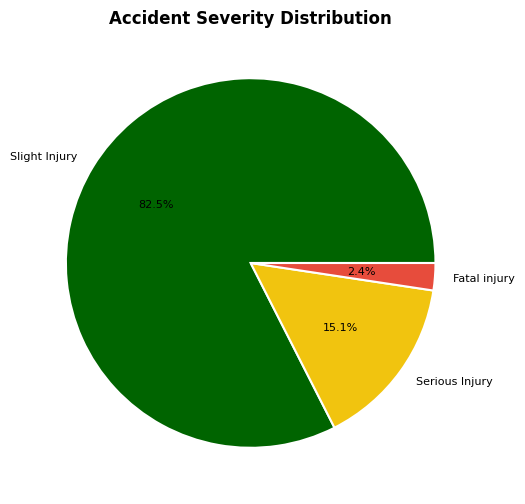

In [8]:
# Visualizing Accident Severity Distribution with Themed Pie Chart
counts = df['Accident_severity'].value_counts()

# Define colors for each severity level
# Order: Slight, Serious, Fatal
road_colors = ['#006400', '#F1c40f', '#e74c3c']
# Create pie chart
plt.pie(counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=road_colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        textprops={'color': 'black', 'weight': 'light', 'fontsize': 8})

plt.title('Accident Severity Distribution', fontsize=12, fontweight='bold')
plt.savefig('visuals/accident_severity.png', dpi=300)
plt.show()



### Road accidents do not all have the same consequences, so this analysis focused on how serious most accidents are. The results show that the majority of accidents result in slight injuries, while fatal cases occur far less often. This suggests that although accidents are frequent, many are survivable. However, the presence of serious and fatal injuries highlights the ongoing risk to human life and the need for stronger preventive measures.

## 

### 2. Accidents by Day of the Week Analysis: Identifying High-Risk Days

In [9]:
df['Day_of_week'].value_counts()

Day_of_week
Friday       2150
Thursday     1967
Wednesday    1945
Tuesday      1878
Monday       1782
Saturday     1777
Sunday       1564
Name: count, dtype: int64

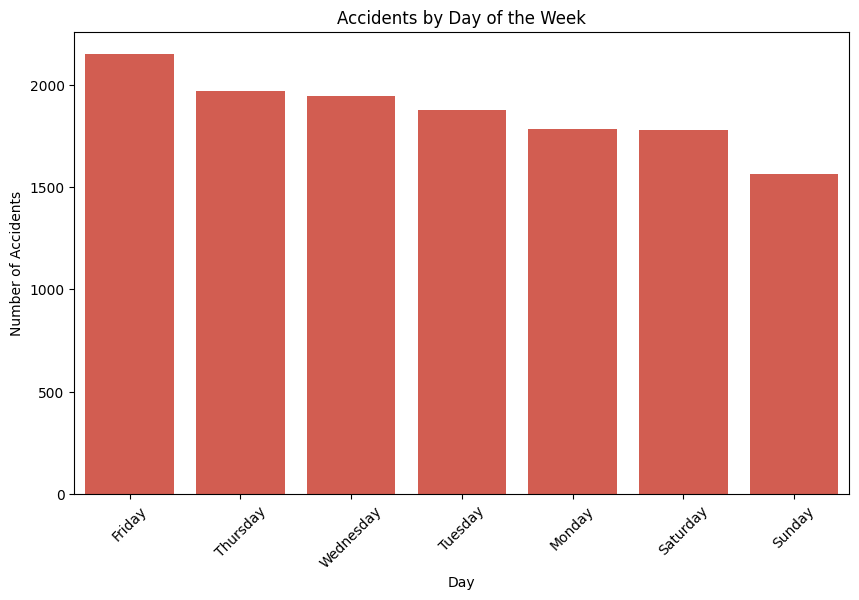

In [10]:
# Visualizing Accidents by Day of Week
sns.countplot(data=df, x='Day_of_week', order=df['Day_of_week'].value_counts().index, color='#e74c3c')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.savefig('visuals/accidents_by_day.png', dpi=300)
plt.show()

###  This analysis was carried out to determine whether accidents occur evenly throughout the week. The findings reveal that accidents increase toward the end of the workweek, with Fridays recording the highest number. Sundays recorded the lowest. This pattern reflects real-life driving behavior, where traffic volume, fatigue, and time pressure are higher during workdays.

### 3. Time Based Analysis: When Accidents Are Most Likely

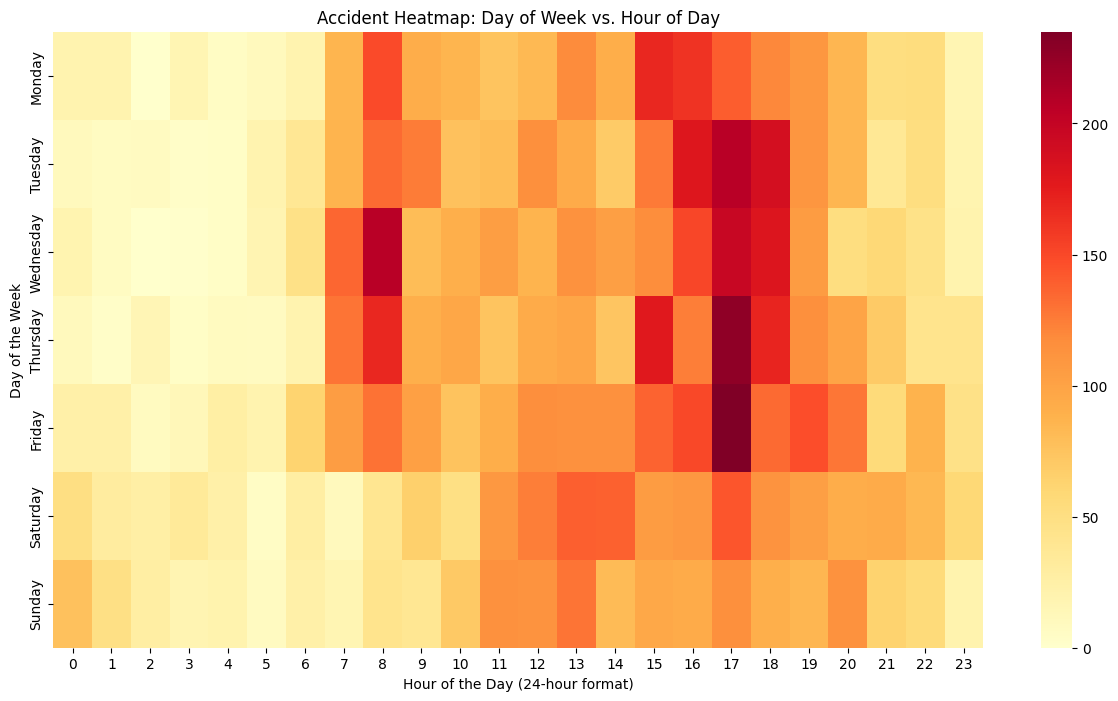

In [11]:
# 1. Extracting the hour from Time column as an integer (0-23)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# 2. Using crosstab for frequency analysis (best for counts)
# This automatically counts how many accidents occurred for each Day/Hour combo
pivot_table = pd.crosstab(df['Day_of_week'], df['Hour'])

# 3. Ensuring the days are in correct chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reindexing if the days exist in the data to avoid blank rows
pivot_table = pivot_table.reindex(day_order)

# 4. Visualizing using Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False) # Yellow to Red scale
plt.title("Accident Heatmap: Day of Week vs. Hour of Day")
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Day of the Week")
plt.savefig('visuals/accident_heatmap.png', dpi=300)
plt.show()

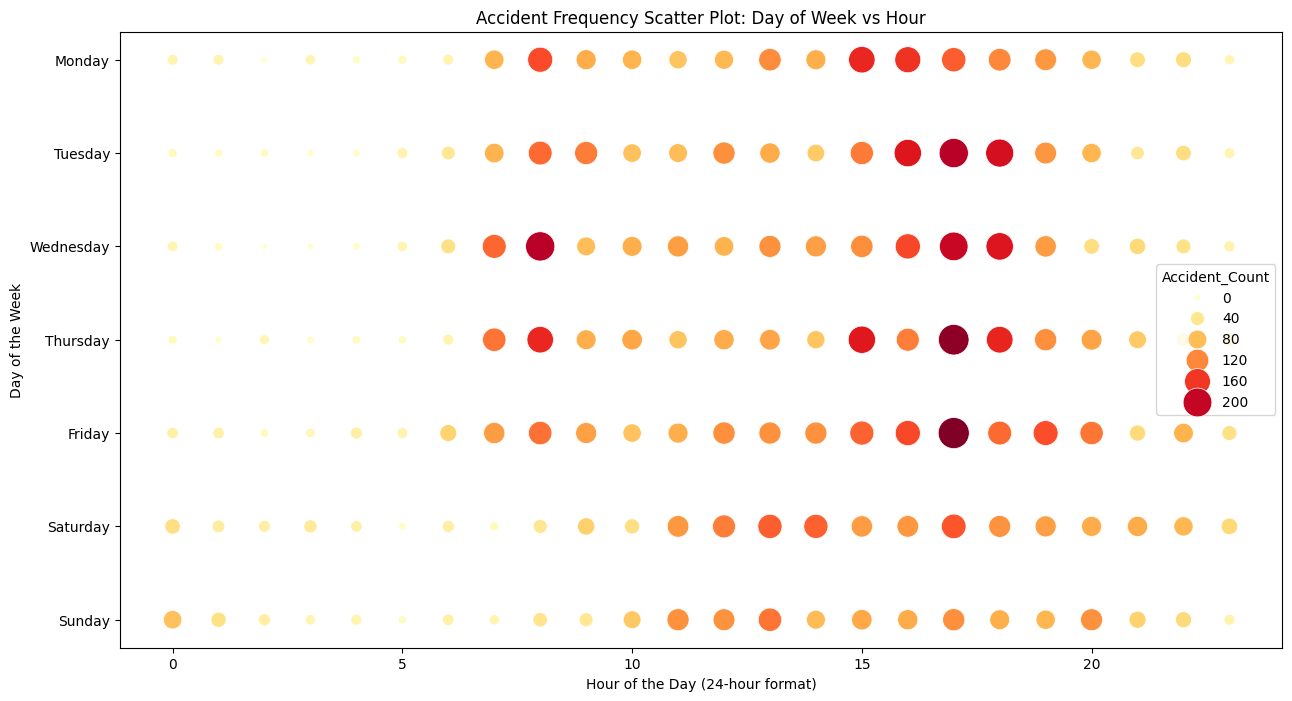

In [12]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour

pivot_table = pd.crosstab(df['Day_of_week'], df['Hour'])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

scatter_df = pivot_table.reset_index().melt(
    id_vars='Day_of_week',
    var_name='Hour',
    value_name='Accident_Count'
)

plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=scatter_df,
    x='Hour',
    y='Day_of_week',
    size='Accident_Count',
    hue='Accident_Count',
    sizes=(20, 500),
    palette='YlOrRd',
    legend='brief'
)

plt.title("Accident Frequency Scatter Plot: Day of Week vs Hour")
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Day of the Week")
plt.savefig('visuals/accident_scatterplot.png', dpi=300)
plt.show()

### To understand when accidents are most likely to happen, accident frequency was analyzed by hour and day. The results show a clear concentration of accidents during evening hours, especially around 5 PM. Fridays at this time recorded the highest accident levels. This aligns with rush-hour congestion, reduced patience, and increased commuter activity.


### 4. Driver Gender Analysis: Who Is More Involved in Accidents?

In [13]:
df['Drivers_gender'].value_counts()

Drivers_gender
Male      12104
Female      959
Name: count, dtype: int64

##

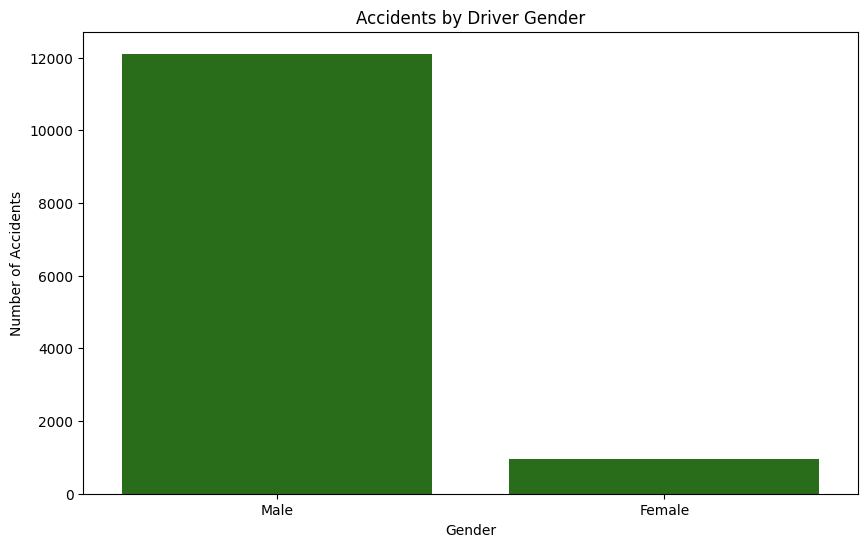

In [14]:
# Visualizing Results
sns.countplot(data=df, x='Drivers_gender', color="#207a0e")
plt.title('Accidents by Driver Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')
plt.savefig('visuals/accidents_by_driver_gender.png', dpi=300)
plt.show()

### This analysis examined accident involvement by driver gender to identify potential risk groups. The data shows that male drivers are involved in significantly more accidents than female drivers. This difference may be linked to driving exposure, behavior, or risk-taking tendencies, highlighting an area for targeted road safety awareness.

### 5. Driver Age Groups Analysis: Understanding Age-Related Risk

In [15]:
df['Age_band_of_casualty'].value_counts()

Age_band_of_casualty
na          4727
18-30       3316
31-50       2581
Under 18    1133
Over 51     1062
5            244
Name: count, dtype: int64

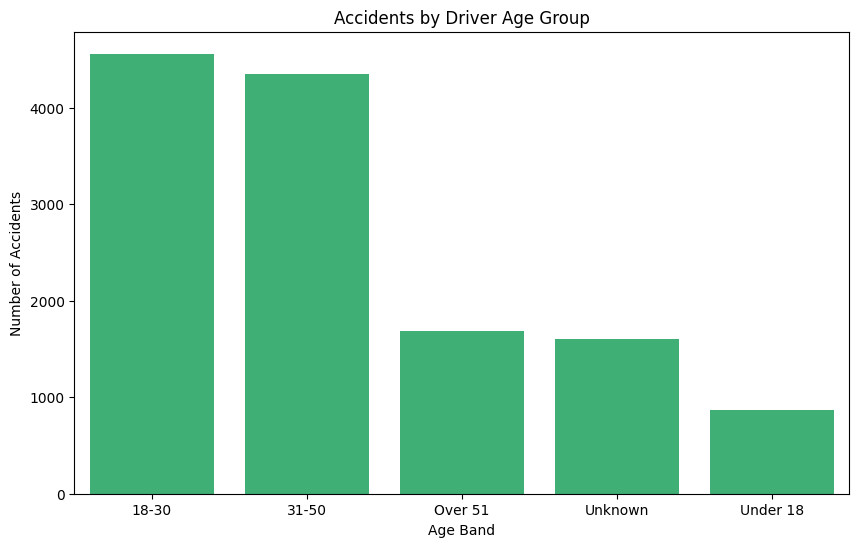

In [20]:
# Visualizing Results
sns.countplot(
    data=df,
    x='Age_band_of_driver',
    order=df['Age_band_of_driver'].value_counts().index, color="#2ec175"
)
plt.title('Accidents by Driver Age Group')
plt.xlabel('Age Band')
plt.ylabel('Number of Accidents')
plt.savefig('visuals/accidents_by_driver_age_group.png', dpi=300)
plt.show()

### To identify which age groups are most affected by road accidents, accidents were analyzed by driver age. Younger and middle-aged drivers recorded the highest involvement. These groups represent the most active drivers and are often exposed to busy roads and longer driving hours. A large portion of missing age data also points to gaps in data recording.

### 6. Causes of Accidents: Why Accidents Happen

In [17]:
df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                            2374
Changing lane to the right               1890
Changing lane to the left                1561
Driving carelessly                       1489
No priority to vehicle                   1266
Moving Backward                          1192
No priority to pedestrian                 766
Other                                     479
Overtaking                                475
Driving under the influence of drugs      357
Driving to the left                       332
Driving at high speed                     209
Getting off the vehicle improperly        208
Overturning                               155
Turnover                                   83
Overspeed                                  62
Overloading                                61
Drunk driving                              27
Improper parking                           26
Unknown                                    26
Driving under the influence of drugs       19
No priority to v

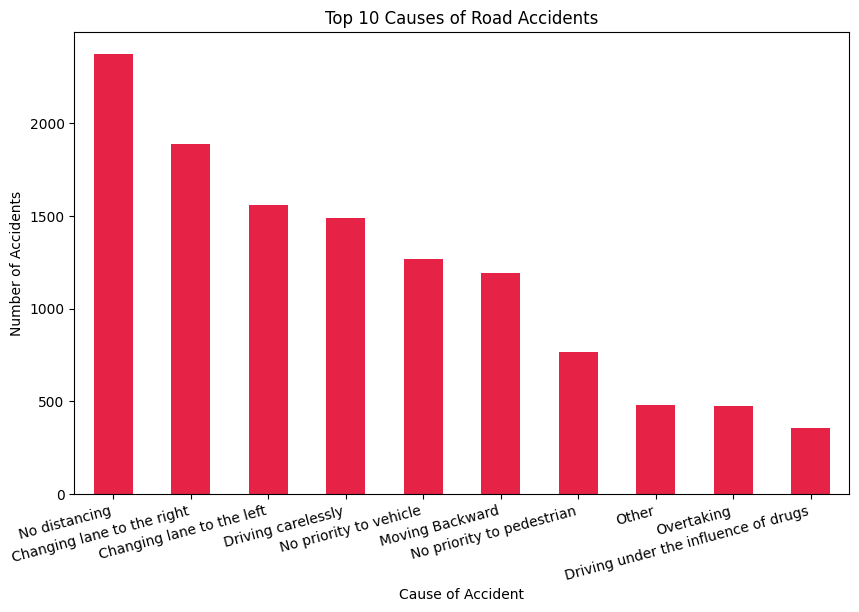

In [21]:
top_causes = df['Cause_of_accident'].value_counts().head(10)

top_causes.plot(kind='bar', color="#e62246")
plt.title('Top 10 Causes of Road Accidents')
plt.xlabel('Cause of Accident')     
plt.ylabel('Number of Accidents')
plt.xticks(rotation=15, ha='right')
plt.savefig('top_10_causes_of_accidents.png')
plt.savefig('visuals/top_10_causes_of_accidents.png', dpi=300)
plt.show()




### Understanding why accidents occur is key to prevention. This analysis shows that most accidents are caused by avoidable behaviors, with lack of proper distancing being the most common cause, followed by unsafe lane changes. These findings suggest that improved driver discipline and enforcement could significantly reduce accident rates.

### 7. Distribution of Casualties per Accident Analysis: Measuring Human Impact

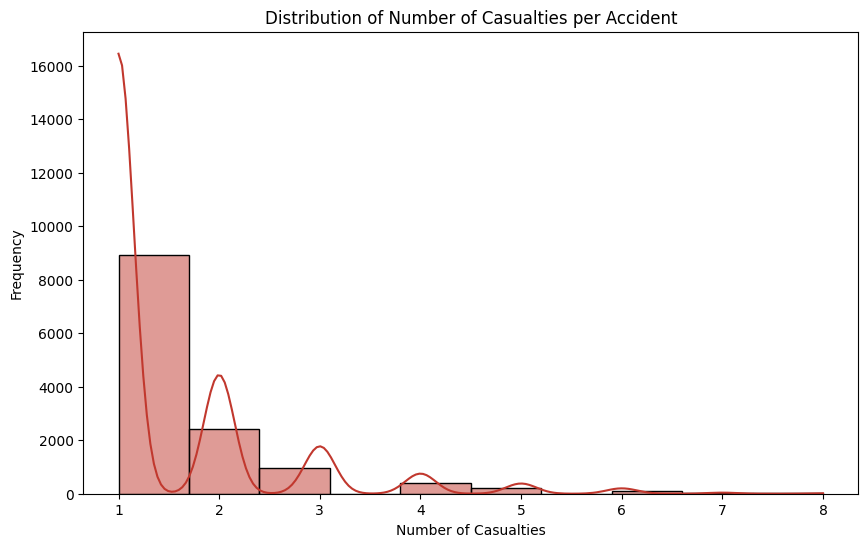

In [19]:
sns.histplot(df['Number_of_casualties'], bins=10, kde=True, color="#c1382e")
plt.title('Distribution of Number of Casualties per Accident')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.savefig('visuals/number_of_casualties_distribution.png', dpi=300)
plt.show()


### This analysis focused on how many people are affected in a single accident. Most accidents involved one casualty, indicating that many incidents are isolated events. However, some accidents involved multiple casualties, with up to eight people affected. These cases highlight the potential for high-impact incidents despite lower frequency.